In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson 
from scipy.optimize import curve_fit
from pandas.plotting import scatter_matrix
#imports the own created package
import bookie_package as bp
import pickle

In [3]:
leagues_short = ['SP1', 'D1', 'E0', 'I1', 'F1', 'N1'] #spanish league, bundesliga, premier league,
leagues_full = ['la_liga', 'bundesliga', 'premier_league', 'serie_a', 'le_championnat', 'Eredivisie']

dict_historical_data = {}

for league, full_name in zip(leagues_short, leagues_full):
    frames = []
    for i in range(17, 21):
        df = pd.read_csv("http://www.football-data.co.uk/mmz4281/"+str(i)+str(i+1)+"/"+league+".csv")
        print(f'Getting {full_name}-{i}{i+1}...')
        df = df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST']] #choose any column you want
        df = df.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals',
                                'HST': 'HomeShotsOnTarget', 'AST':'AwayShotsOnTarget'})
        df = df.assign(Season=i)
        frames.append(df)
    df_historical_data = pd.concat(frames)
    dict_historical_data[full_name] = df_historical_data
# df.to_csv (f'betting-raw.csv', index = False, header=True)
with open('data.pickle', 'wb') as f:
    pickle.dump(dict_historical_data, f)

Getting la_liga-1718...
Getting la_liga-1819...
Getting la_liga-1920...
Getting la_liga-2021...
Getting bundesliga-1718...
Getting bundesliga-1819...
Getting bundesliga-1920...
Getting bundesliga-2021...
Getting premier_league-1718...
Getting premier_league-1819...
Getting premier_league-1920...
Getting premier_league-2021...
Getting serie_a-1718...
Getting serie_a-1819...
Getting serie_a-1920...
Getting serie_a-2021...
Getting le_championnat-1718...
Getting le_championnat-1819...
Getting le_championnat-1920...
Getting le_championnat-2021...
Getting Eredivisie-1718...
Getting Eredivisie-1819...
Getting Eredivisie-1920...
Getting Eredivisie-2021...


In [4]:
for league in leagues_full:
    HTGDIFF = []
    ATGDIFF = []
    for index, row in dict_historical_data[league].iterrows():
        HTGDIFF.append(row['HomeGoals'] - row['AwayGoals'])
        ATGDIFF.append(-(row['HomeGoals'] - row['AwayGoals']))
    dict_historical_data[league]['HTGDIFF'] = HTGDIFF
    dict_historical_data[league]['ATGDIFF'] = ATGDIFF

array([[<AxesSubplot:xlabel='HomeGoals', ylabel='HomeGoals'>,
        <AxesSubplot:xlabel='AwayGoals', ylabel='HomeGoals'>,
        <AxesSubplot:xlabel='HomeShotsOnTarget', ylabel='HomeGoals'>,
        <AxesSubplot:xlabel='AwayShotsOnTarget', ylabel='HomeGoals'>,
        <AxesSubplot:xlabel='HTGDIFF', ylabel='HomeGoals'>,
        <AxesSubplot:xlabel='ATGDIFF', ylabel='HomeGoals'>],
       [<AxesSubplot:xlabel='HomeGoals', ylabel='AwayGoals'>,
        <AxesSubplot:xlabel='AwayGoals', ylabel='AwayGoals'>,
        <AxesSubplot:xlabel='HomeShotsOnTarget', ylabel='AwayGoals'>,
        <AxesSubplot:xlabel='AwayShotsOnTarget', ylabel='AwayGoals'>,
        <AxesSubplot:xlabel='HTGDIFF', ylabel='AwayGoals'>,
        <AxesSubplot:xlabel='ATGDIFF', ylabel='AwayGoals'>],
       [<AxesSubplot:xlabel='HomeGoals', ylabel='HomeShotsOnTarget'>,
        <AxesSubplot:xlabel='AwayGoals', ylabel='HomeShotsOnTarget'>,
        <AxesSubplot:xlabel='HomeShotsOnTarget', ylabel='HomeShotsOnTarget'>,
        <Axe

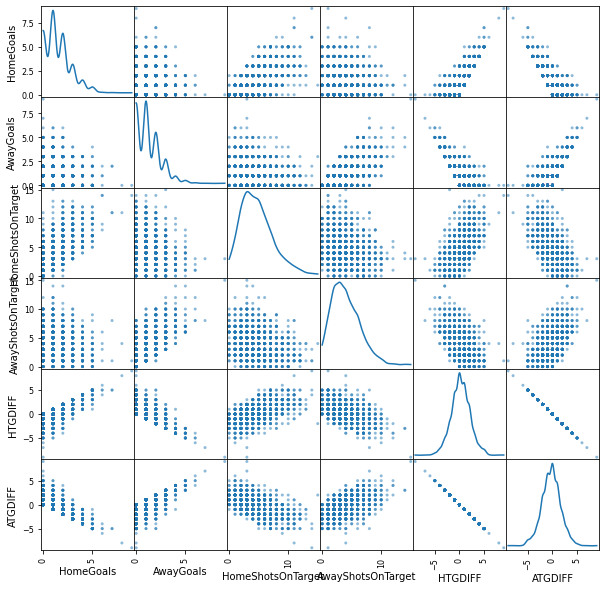

In [5]:
# la_liga as example
scatter_matrix(dict_historical_data['premier_league'][['HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals', 'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HTGDIFF', 'ATGDIFF']], diagonal='kde', figsize=(10,10))

In [6]:
# la_liga as example
dict_historical_data['premier_league'][['HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals', 'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HTGDIFF', 'ATGDIFF']].describe()

HomeGoals    AwayGoals  HomeShotsOnTarget  AwayShotsOnTarget  \
count  1500.000000  1500.000000        1500.000000        1500.000000   
mean      1.490667     1.235333           4.621333           3.941333   
std       1.308582     1.204818           2.629808           2.344402   
min       0.000000     0.000000           0.000000           0.000000   
25%       1.000000     0.000000           3.000000           2.000000   
50%       1.000000     1.000000           4.000000           4.000000   
75%       2.000000     2.000000           6.000000           5.000000   
max       9.000000     9.000000          15.000000          15.000000   

           HTGDIFF      ATGDIFF  
count  1500.000000  1500.000000  
mean      0.255333    -0.255333  
std       1.908726     1.908726  
min      -9.000000    -9.000000  
25%      -1.000000    -1.000000  
50%       0.000000     0.000000  
75%       1.000000     1.000000  
max       9.000000     9.000000

In [7]:
for i in dict_historical_data:
    dict_historical_data[i]['TotalGoals'] = dict_historical_data[i]['HomeGoals'] + dict_historical_data[i]['AwayGoals']

In [8]:
for i in dict_historical_data:
    print(i)
    print(dict_historical_data[i]['TotalGoals'].mean())

la_liga
2.5708609271523177
bundesliga
3.0477366255144034
premier_league
2.726
serie_a
2.864058355437666
le_championnat
2.6508161816891413
Eredivisie
3.179130434782609


In [9]:
#past 5 seasons
for i in dict_historical_data:
    dict_historical_data[i] = dict_historical_data[i].loc[dict_historical_data[i]['Season'] >= 15]

<ipython-input-10-994defa681a3>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


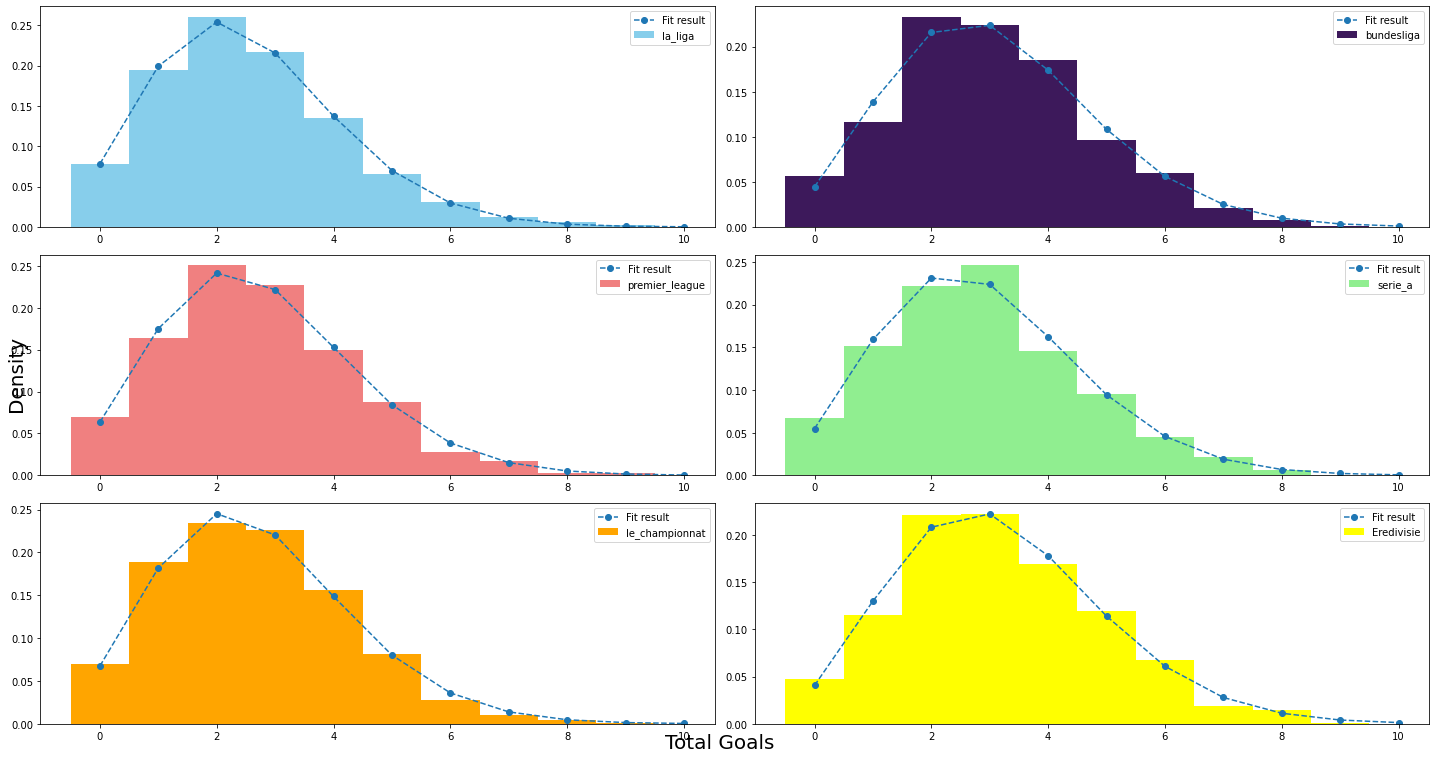

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=2)
i=0
for row in ax:
    for col in row:
        dict_plot = {0:'la_liga', 1:'bundesliga', 2:'premier_league', 3:'serie_a', 4: 'le_championnat', 5: 'Eredivisie'}
        dict_colors = {0:'skyblue', 1:'#3D195B', 2:'lightcoral', 3:'lightgreen', 4: 'orange', 5: 'yellow'}
        data = dict_historical_data[dict_plot[i]]['TotalGoals']
        # the bins should be of integer width (poisson is an integer distribution)
        bins = np.arange(11) - 0.5
        entries, bin_edges, patches = col.hist(data, bins=bins, density=True, label=dict_plot[i], color=dict_colors[i])
        bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])

        #curve
        def fit_function(x, lamb):
            """Poisson function.Lamb is the fit parameter"""
            return poisson.pmf(x, lamb)
        parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries) #optimal parameters
        x_plot = np.arange(0, 11)
        col.plot(x_plot, fit_function(x_plot, *parameters),marker='o', linestyle='--',
                 label='Fit result',)
        col.legend()
        i+=1

fig.set_size_inches(20, 10.5)
fig.text(0.5, 0.005, 'Total Goals', ha='center', size=20)
fig.text(0.005, 0.5, 'Density', va='center', rotation='vertical', size=20)
fig.tight_layout()
fig.show()
fig.savefig('histogram.png')

<ipython-input-11-2462c5ff64eb>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


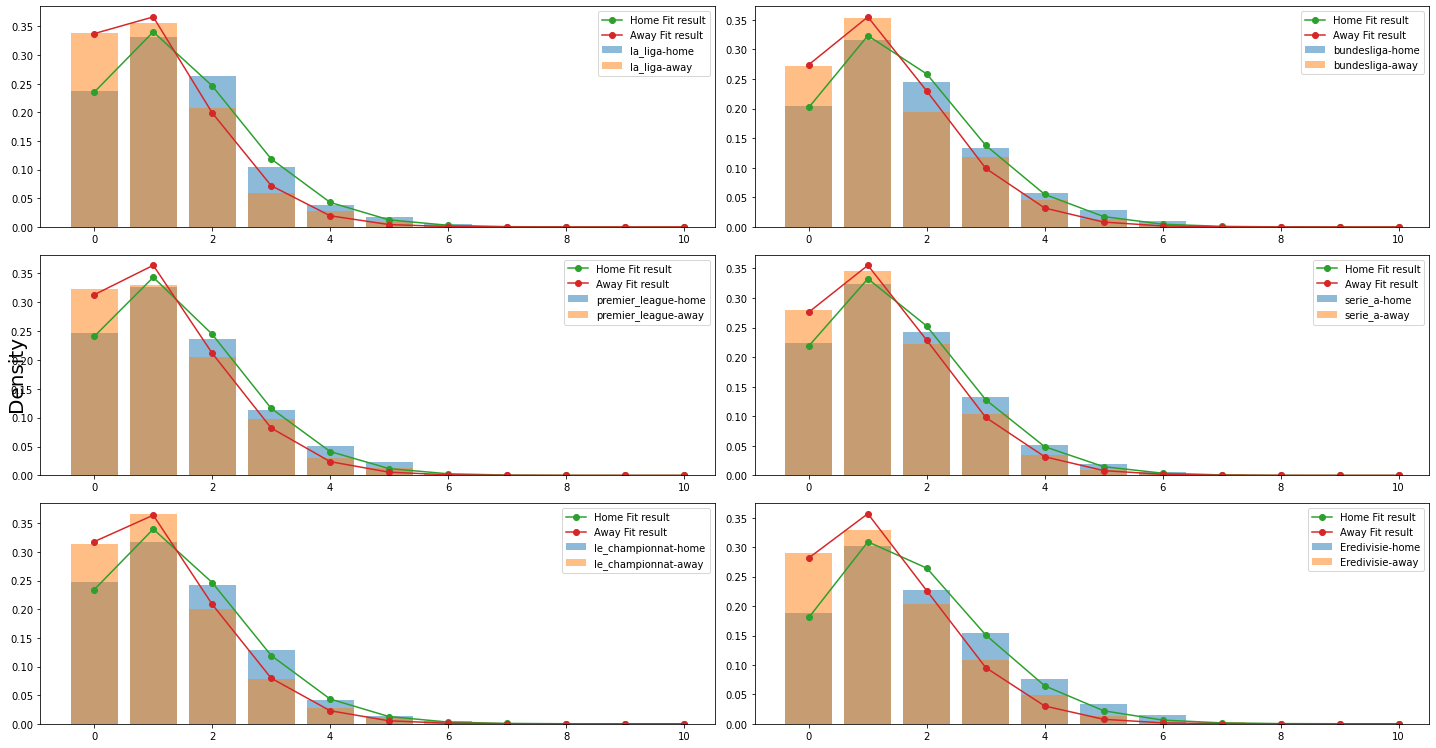

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=2)
i=0
for row in ax:
    for col in row:
        dict_plot = {0:'la_liga', 1:'bundesliga', 2:'premier_league', 3:'serie_a', 4: 'le_championnat', 5: 'Eredivisie'}
        data_home = dict_historical_data[dict_plot[i]]['HomeGoals']
        data_away = dict_historical_data[dict_plot[i]]['AwayGoals']
        # the bins should be of integer width (poisson is an integer distribution)
        bins = np.arange(11) - 0.5
        entries_home, bin_edges_home, patches_home = col.hist(data_home, bins=bins, density=True,
                                                        label=f'{dict_plot[i]}-home', alpha=0.5, histtype='bar', rwidth=0.8)
        entries_away, bin_edges_away, patches_away = col.hist(data_away, bins=bins, density=True, 
                                                        label=f'{dict_plot[i]}-away', alpha=0.5, histtype='bar', rwidth=0.8)
        bin_middles_home = 0.5 * (bin_edges_home[1:] + bin_edges_home[:-1])
        bin_middles_away = 0.5 * (bin_edges_away[1:] + bin_edges_away[:-1])

        #curve
        def fit_function(x, lamb):
            """Poisson function.Lamb is the fit parameter"""
            return poisson.pmf(x, lamb)
        parameters_home, cov_matrix = curve_fit(fit_function, bin_middles_home, entries_home) #optimal parameters
        x_plot = np.arange(0, 11)
        col.plot(x_plot, fit_function(x_plot, *parameters_home),marker='o',
                 label='Home Fit result',)
        parameters_away, cov_matrix = curve_fit(fit_function, bin_middles_away, entries_away) #optimal parameters
        x_plot = np.arange(0, 11)
        col.plot(x_plot, fit_function(x_plot, *parameters_away),marker='o',
                 label='Away Fit result',)
        col.legend()
        i+=1

fig.set_size_inches(20, 10.5)
fig.text(0.005, 0.5, 'Density', va='center', rotation='vertical', size=20)
fig.tight_layout()
fig.show()
fig.savefig('histogram.png')

In [12]:
def calculate_strength(league):
    home = dict_historical_data[league][['HomeTeam', 'HomeGoals', 'AwayGoals']].rename(
        columns={'HomeTeam':'Team', 'HomeGoals':'HomeScored', 'AwayGoals':'HomeConceded'}).groupby(
        ['Team'], as_index=False)[['HomeScored', 'HomeConceded']].mean()
    away = dict_historical_data[league][['AwayTeam', 'HomeGoals', 'AwayGoals']].rename(
        columns={'AwayTeam':'Team', 'HomeGoals':'AwayConceded', 'AwayGoals':'AwayScored'}).groupby(
        ['Team'], as_index=False)[['AwayScored', 'AwayConceded']].mean()

    df_league_strength = pd.merge(home, away, on='Team')
    average_home_scored, average_home_conceded = home['HomeScored'].mean(), home['HomeConceded'].mean()
    average_away_scored, average_away_conceded = away['AwayScored'].mean(), away['AwayConceded'].mean()

    df_league_strength['HomeScored'] /= average_home_scored
    df_league_strength['HomeConceded'] /= average_home_conceded
    df_league_strength['AwayScored'] /= average_away_scored
    df_league_strength['AwayConceded'] /= average_away_conceded

    df_league_strength.set_index('Team', inplace=True)
    return df_league_strength
    
def predict_points(home, away):
    if home in df_league_strength.index and away in df_league_strength.index:
        #home_scored * away_conceded
        lamb_home = df_league_strength.at[home,'HomeScored'] * df_league_strength.at[away,'AwayConceded']
        lamb_away = df_league_strength.at[away,'AwayScored'] * df_league_strength.at[home,'HomeConceded']
        prob_home, prob_away, prob_draw = 0, 0, 0
        for x in range(0,11): #number of goals home team
            for y in range(0, 11): #number of goals away team
                p = poisson.pmf(x, lamb_home) * poisson.pmf(y, lamb_away)
                if x == y:
                    prob_draw += p
                elif x > y:
                    prob_home += p
                else:
                    prob_away += p
        
        points_home = 3 * prob_home + prob_draw
        points_away = 3 * prob_away + prob_draw
        return (points_home, points_away)
    else:
        return (0, 0)

In [13]:
def _add_win_lose_draw(is_type, x, y):
    if is_type == 'predict_result':
        if x == y:
            predict_win_lose_draw.append('Draw')
        elif x > y:
            predict_win_lose_draw.append('Home_Win')
        else:
            predict_win_lose_draw.append('Away_Win')
    else:
        if x == y:
            win_lose_draw.append('Draw')
        elif x > y:
            win_lose_draw.append('Home_Win')
        else:
            win_lose_draw.append('Away_Win')

for league in leagues_full:
    result_list = []
    win_lose_draw = []
    predict_win_lose_draw = []
    prediction_accuracy = []
    # league = 'la_liga' # 'la_liga', 'bundesliga', 'premier_league', 'serie_a', 'le_championnat', 'Eredivisie'
    df_league_strength = calculate_strength(league)

    df_predict = dict_historical_data[league].loc[dict_historical_data[league]['Season'] == 20]
    df_predict = df_predict[['HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals']]
    df_predict['score'] = df_predict[['HomeGoals', 'AwayGoals']].astype(str).agg(' - '.join, axis=1)

    for index, row in df_predict.iterrows():
        result = predict_points(row['HomeTeam'], row['AwayTeam'])
        x = round(result[0])
        y = round(result[1])
        result = f'{x} - {y}'
        result_list.append(result)
        _add_win_lose_draw('result', row['HomeGoals'], row['AwayGoals'])
        _add_win_lose_draw('predict_result', int(x), int(y))

    df_predict['predict_poisson'] = result_list
    df_predict['result'] = win_lose_draw
    df_predict['predict_result'] = predict_win_lose_draw
    df_predict = df_predict.drop(['HomeGoals', 'AwayGoals'], axis=1)

    for index, row in df_predict.iterrows():
        if row['predict_result'] == row['result']:
            prediction_accuracy.append(True)
        else:
            prediction_accuracy.append(False)
    df_predict['Accuracy'] = prediction_accuracy
    accuracy = len(df_predict[df_predict['Accuracy'] == True]) / len(df_predict) * 100
    print(f'Accuracy of {league} predicting win-lose-draw: {accuracy}%')
    # print(df_predict.head(5))

Accuracy of la_liga predicting win-lose-draw: 48.64864864864865%
Accuracy of bundesliga predicting win-lose-draw: 51.178451178451176%
Accuracy of premier_league predicting win-lose-draw: 48.61111111111111%
Accuracy of serie_a predicting win-lose-draw: 55.434782608695656%
Accuracy of le_championnat predicting win-lose-draw: 48.10810810810811%
Accuracy of Eredivisie predicting win-lose-draw: 50.65359477124183%


In [20]:
print(calculate_strength('premier_league'))

                  HomeScored  HomeConceded  AwayScored  AwayConceded
Team                                                                
Arsenal             1.487526      0.822946    1.163081      0.911902
Aston Villa         0.959399      1.153277    1.024007      0.950138
Bournemouth         0.991345      1.136296    0.973872      1.244727
Brighton            0.792059      1.015982    0.740143      0.937470
Burnley             0.753422      0.975343    0.928115      0.954515
Cardiff             0.800702      1.523974    0.602873      1.042879
Chelsea             1.236385      0.619749    1.421544      0.877813
Crystal Palace      0.792059      1.005823    0.998605      1.022694
Everton             1.014222      0.934704    0.975109      0.945992
Fulham              0.606967      1.276843    0.690609      1.191992
Huddersfield        0.495672      1.122928    0.556498      1.312009
Leeds               1.006173      0.846652    1.566440      1.171837
Leicester           1.120474      

In [25]:
print(predict_points('West Ham', 'Southampton'))

(0, 0)
